In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
original_dataset = pd.read_csv("gender_classification_v7-1.csv", encoding= 'unicode_escape')
print(original_dataset.shape)
original_dataset.head()

(5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
original_dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
target_column = 'gender'

In [ ]:
original_dataset.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,4987.000000,4979.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181913,5.946957,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107422,0.541133,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [ ]:
original_dataset.value_counts()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  lips_thin  distance_nose_to_lip_long  gender
1          14.2               6.5                 0          0          0          0                          Female    9
           13.7               6.1                 0          0          0          0                          Female    7
           12.3               5.6                 0          0          0          0                          Female    7
           11.5               5.3                 0          0          0          0                          Female    7
           13.4               6.4                 0          0          0          0                          Female    7
                                                                                                                       ..
           12.2               5.1                 1          1          1          0                          Male      1
                             

In [ ]:
original_dataset.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [ ]:
original_dataset.isnull().sum()

long_hair                     0
forehead_width_cm            14
forehead_height_cm           22
nose_wide                     0
nose_long                     0
lips_thin                     0
distance_nose_to_lip_long     0
gender                        0
dtype: int64

In [ ]:
# Filling Null Values
original_dataset['forehead_width_cm'].fillna(original_dataset['forehead_width_cm'].mean(), inplace=True)
original_dataset['forehead_height_cm'].fillna(original_dataset['forehead_height_cm'].mean(), inplace=True)


In [ ]:
original_dataset.isnull().sum()


long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
# showing the missing value percentage
original_dataset.isnull().sum() / len(original_dataset) * 100

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [ ]:
encoding_columns = []
for col in original_dataset.columns:
    if original_dataset[col].dtype == 'object':
        encoding_columns.append(col)
encoding_columns

['gender']

In [ ]:
""" here we are label encoding the columns which are not numerical """
from sklearn.preprocessing import LabelEncoder
def label_encode(dataset, list_of_columns):
    le = LabelEncoder()
    for i in list_of_columns:
        dataset[i] = le.fit_transform(dataset[i])
    return dataset
original_dataset = label_encode(original_dataset, encoding_columns)
original_dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
original_dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
columns = original_dataset.columns.tolist()
columns

['long_hair',
 'forehead_width_cm',
 'forehead_height_cm',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long',
 'gender']

In [ ]:
original_dataset[target_column].value_counts()

0    2501
1    2500
Name: gender, dtype: int64

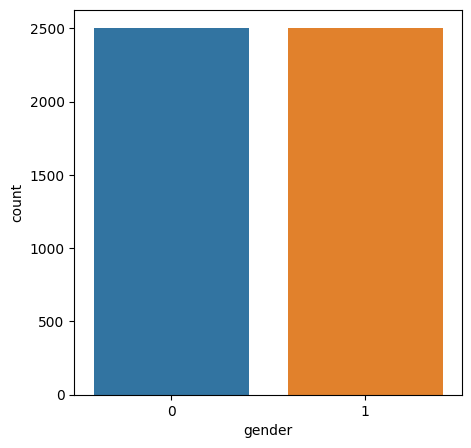

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = target_column, data = original_dataset)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# do a train test split of 0.8 and 0.2
train, test = train_test_split(original_dataset, test_size = 0.2, random_state = 42)

In [ ]:
label_column = target_column
xtrain, ytrain = train.drop(label_column, axis = 1), train[label_column]
xtest, ytest = test.drop(label_column, axis = 1), test[label_column]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1500x1500 with 0 Axes>

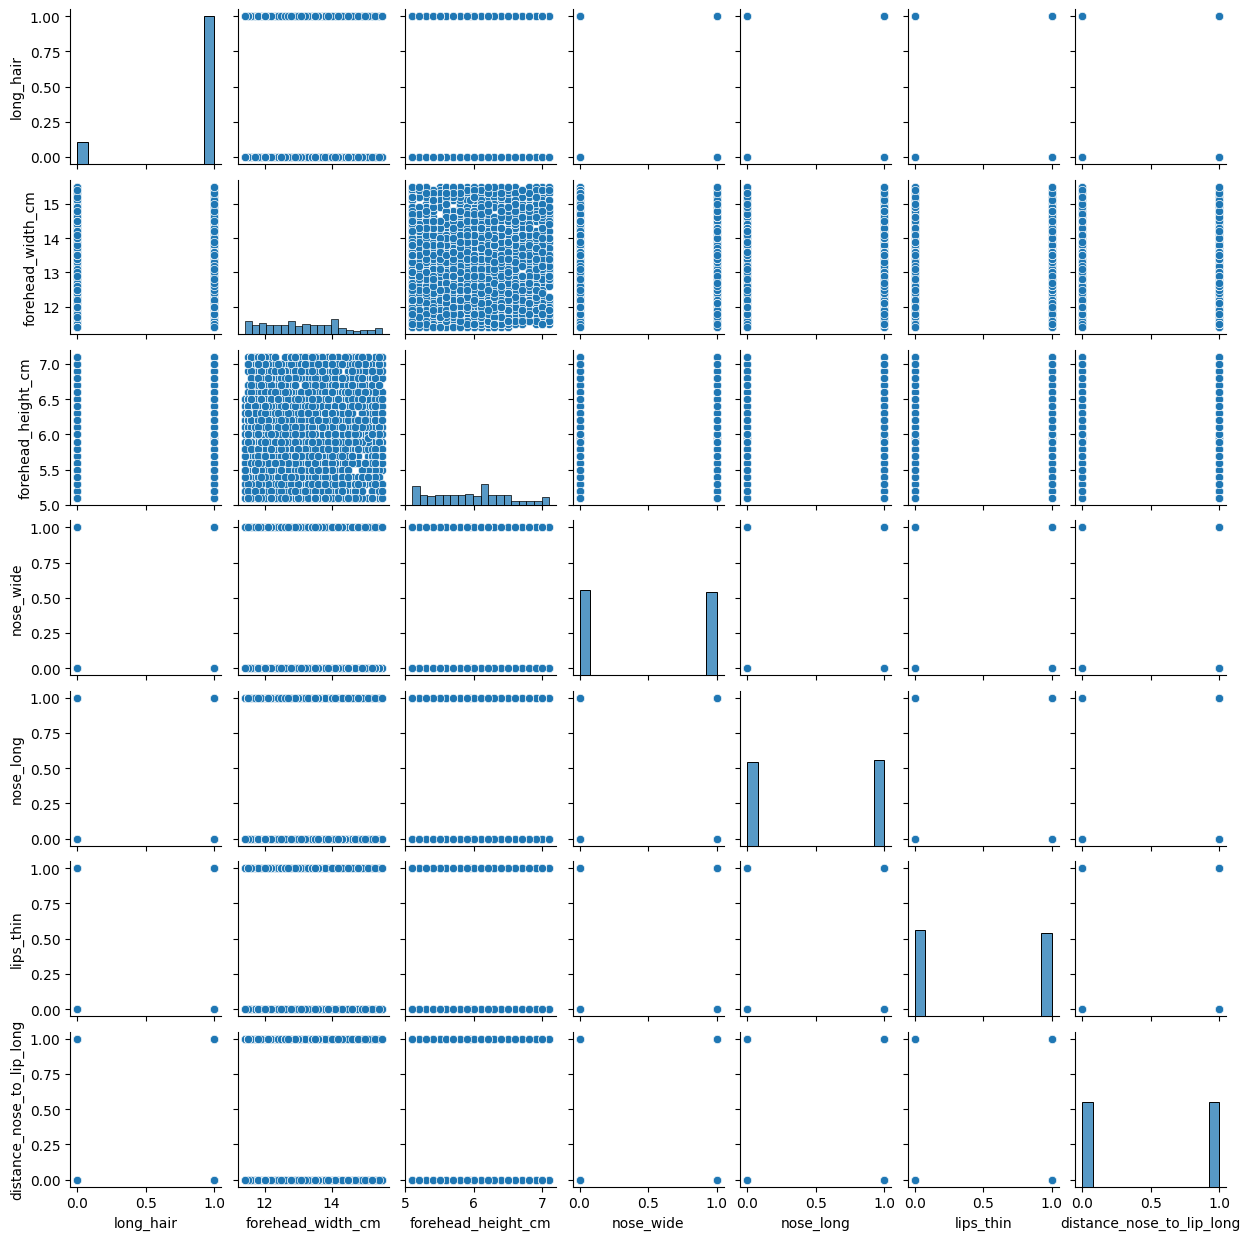

In [ ]:
label_column = 'gender'
xtrain, ytrain = train.drop(label_column, axis=1), train[label_column]
xtest, ytest = test.drop(label_column, axis=1), test[label_column]

# Create a scatter plot matrix of the features in xtrain
plt.figure(figsize=(15, 15))
cols = xtrain.columns[:]  # Select first 5 columns
sns.pairplot(xtrain[cols], size=1.8)
plt.show()

In [ ]:
original_dataset.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006744,-0.017633,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006744,1.000000,0.087392,0.250331,0.257053,0.257255,0.250579,0.332897
forehead_height_cm,-0.017633,0.087392,1.000000,0.212486,0.194465,0.205596,0.215048,0.277689
nose_wide,0.001216,0.250331,0.212486,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257053,0.194465,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.257255,0.205596,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.250579,0.215048,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.332897,0.277689,0.758502,0.744147,0.743319,0.754850,1.000000


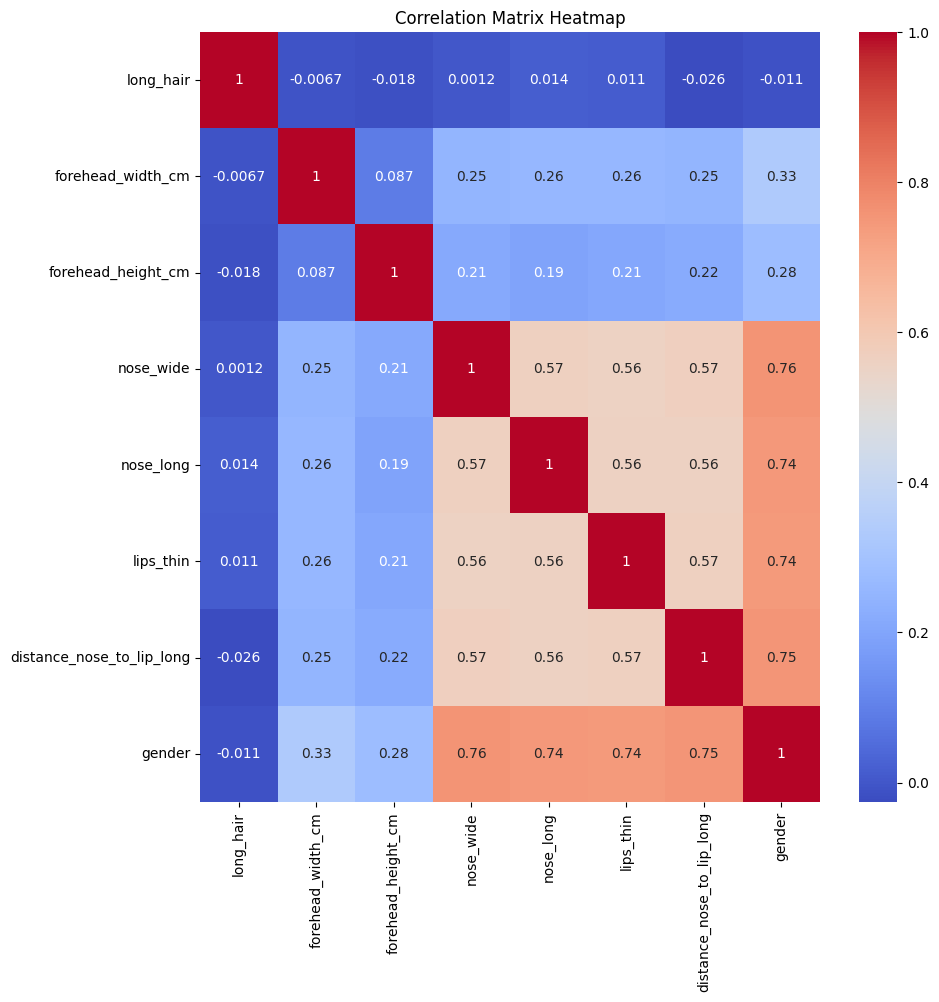

In [ ]:
corr_matrix = original_dataset.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

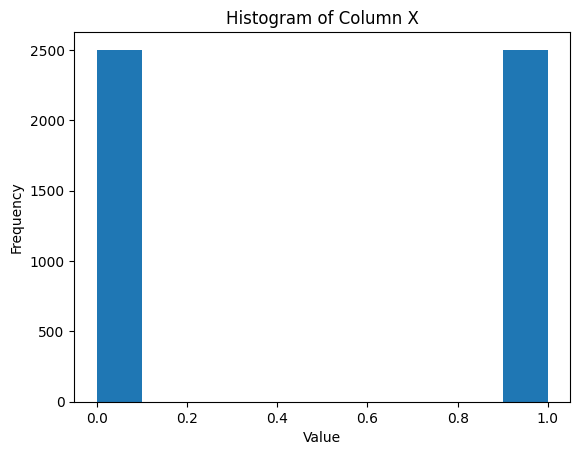

In [ ]:
x = original_dataset[target_column]

# Create a histogram of the data
plt.hist(x, bins=10)
plt.title('Histogram of Column X')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Model Building Part


Classification

KNN

In [ ]:
# import Knn from sklearn
from sklearn.neighbors import KNeighborsClassifier
# create a Knn model
knn_model = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn_model, param_grid, cv = 5)
knn_gscv.fit(xtrain, ytrain)
best_k = knn_gscv.best_params_['n_neighbors']

# knn_model = KNeighborsClassifier(n_neighbors = best_k)

param_grid = {'weights': ['uniform', 'distance']}
knn_gscv = GridSearchCV(knn_model, param_grid, cv = 5)
knn_gscv.fit(xtrain, ytrain)
best_weights = knn_gscv.best_params_['weights']

# knn_model = KNeighborsClassifier(n_neighbors = best_k, weights = best_weights)

param_grid = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_gscv = GridSearchCV(knn_model, param_grid, cv = 5)
knn_gscv.fit(xtrain, ytrain)
best_algorithm = knn_gscv.best_params_['algorithm']

knn_model = KNeighborsClassifier(n_neighbors = best_k, weights = best_weights, algorithm = best_algorithm)


# fit the model
knn_model.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='brute', n_neighbors=16)

In [ ]:
y_pred_knn = knn_model.predict(xtest)

In [ ]:
# print the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred_knn))

0.967032967032967


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_knn, zero_division = 0))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       502
           1       0.99      0.95      0.97       499

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



<Axes: >

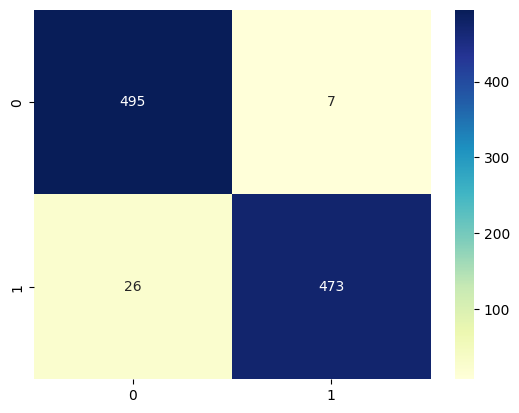

In [ ]:
# plot the confusion matrix with seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_knn)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")

Decision Tree

In [ ]:
# import decision tree from sklearn
from sklearn.tree import DecisionTreeClassifier
# create a decision tree model
dt_model = DecisionTreeClassifier()

# find out the best parameters for the decision tree
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 25)}

dt_gscv = GridSearchCV(dt_model, param_grid, cv = 5)
dt_gscv.fit(xtrain, ytrain)
best_params = dt_gscv.best_params_

dt_model = DecisionTreeClassifier(criterion = best_params['criterion'], max_depth = best_params['max_depth'])

# fit the model
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=6)

In [ ]:
# predict the test set
y_pred_dt = dt_model.predict(xtest)
# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred_dt))

0.965034965034965


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_dt, zero_division = 0))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       502
           1       0.99      0.94      0.96       499

    accuracy                           0.97      1001
   macro avg       0.97      0.96      0.97      1001
weighted avg       0.97      0.97      0.97      1001



<Axes: >

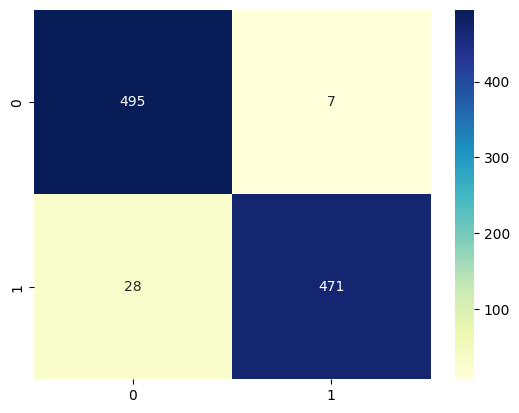

In [ ]:
# plot the confusion matrix with seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")

SVM

In [ ]:
# import svm from sklearn
from math import gamma
from sklearn.svm import SVC
# create a svm model
svm_model = SVC(
    kernel='linear',
    gamma=0.7,
    C=1.0
    )

# fit the model
svm_model.fit(xtrain, ytrain)

SVC(gamma=0.7, kernel='linear')

In [ ]:
y_pred_svm = svm_model.predict(xtest)
accuracy_score(ytest, y_pred_svm)
# classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_svm, zero_division = 0))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       502
           1       0.96      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



<Axes: >

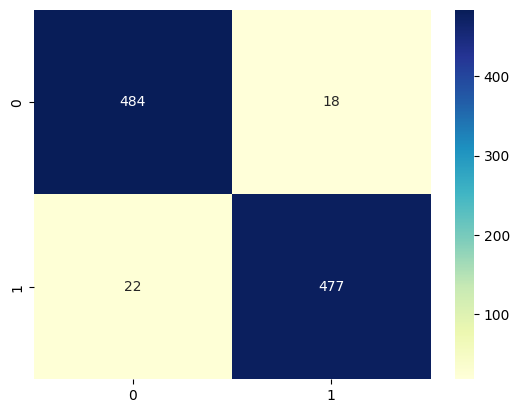

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_svm)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")

**Comparison**

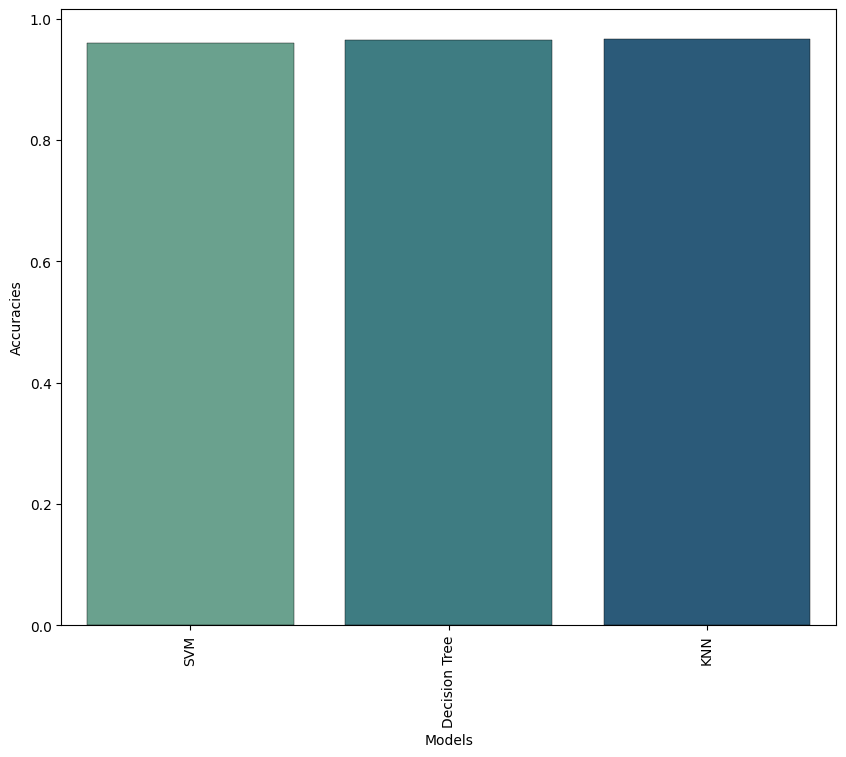

In [ ]:
# plot all the accuracy of the models in a bar plot in descending order
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# create a list of all the models
models = ['KNN', 'Decision Tree', 'SVM']
# create a list of all the accuracies
accuracies = [ accuracy_score(ytest, y_pred_knn), accuracy_score(ytest, y_pred_dt), accuracy_score(ytest, y_pred_svm)]
# create a dataframe of the models and their accuracies
df = pd.DataFrame({'Models': models, 'Accuracies': accuracies})
# sort the dataframe in descending order
df = df.sort_values(by = 'Accuracies', ascending = True)
# plot the dataframe
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Models', y = 'Accuracies', data = df, palette = 'crest', edgecolor = 'black', linewidth = 0.3)
plt.xticks(rotation = 90)
plt.show()

Classification Input Test

In [ ]:
inp = input().split()
random_input = list(map(int, inp))
y_pred_svm = svm_model.predict([random_input])
y_pred_dt = dt_model.predict([random_input])
y_pred_knn = knn_model.predict([random_input])
print(y_pred_svm)
print(y_pred_dt)
print(y_pred_knn)

1 14 5 1 0 0 0
[0]
[0]
[0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Regression Models

Mean Squared Error: 0.029010989010989013


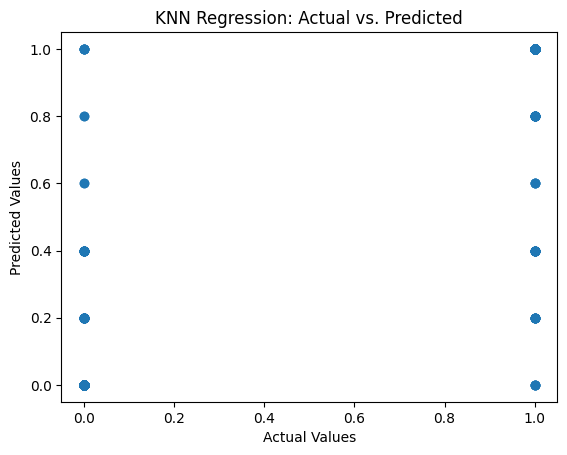

In [ ]:
# KNN Regression
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split your data into features (X) and target (y)
X = original_dataset.drop(['gender'], axis=1)  # Replace 'TargetColumn' with the actual column name
y = original_dataset['gender']  # Replace 'TargetColumn' with the actual column name

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can change the value of n_neighbors

# Fit the model to the training data
knn_model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred_knnr = knn_model.predict(xtest)

# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred_knnr)
print("Mean Squared Error:", mse)

# Visualize the results
plt.scatter(ytest, y_pred_knnr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: Actual vs. Predicted")
plt.show()


Mean Squared Error: 0.041914711947976274


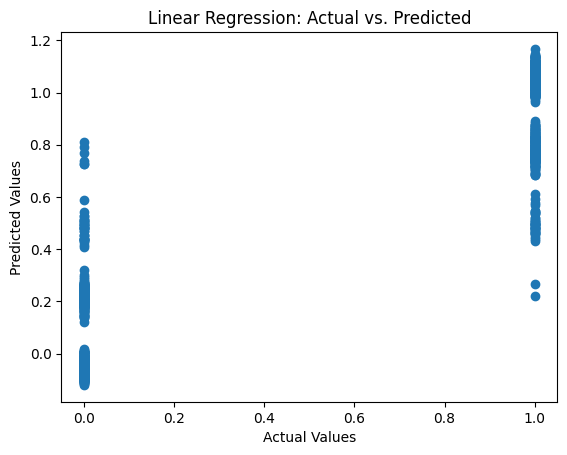

In [ ]:
# Linear Regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression  # Corrected import
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split your data into features (X) and target (y)
X = original_dataset.drop(['gender'], axis=1)  # Replace 'TargetColumn' with the actual column name
y = original_dataset['gender']  # Replace 'TargetColumn' with the actual column name

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear regression model
linear = LinearRegression()  # Corrected class name

# Fit the model to the training data
linear.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred_linear = linear.predict(xtest)

# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred_linear)
print("Mean Squared Error:", mse)

# Visualize the results
plt.scatter(ytest, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")  # Updated plot title
plt.show()


Mean Squared Error: 0.06327827465590415


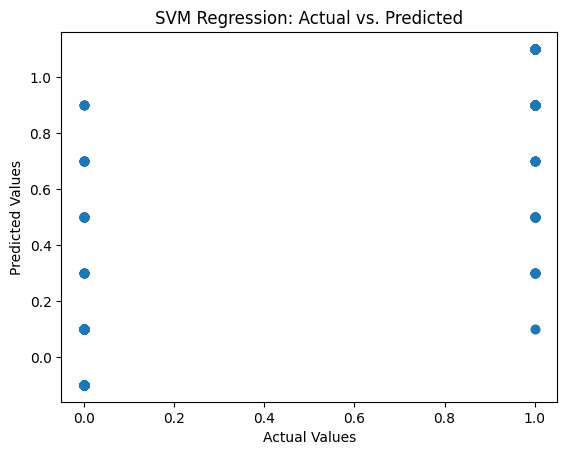

In [ ]:
# SVM Regression
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Split your data into features (X) and target (y)
X = original_dataset.drop(['gender'], axis=1)  # Replace 'TargetColumn' with the actual column name
y = original_dataset['gender']  # Replace 'TargetColumn' with the actual column name

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR model
svr_model = SVR(kernel='linear')  # You can change the kernel type

# Fit the model to the training data
svr_model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred_svm = svr_model.predict(xtest)

# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(ytest, y_pred_svm)
print("Mean Squared Error:", mse)

# Visualize the results
plt.scatter(ytest, y_pred_svm)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVM Regression: Actual vs. Predicted")
plt.show()


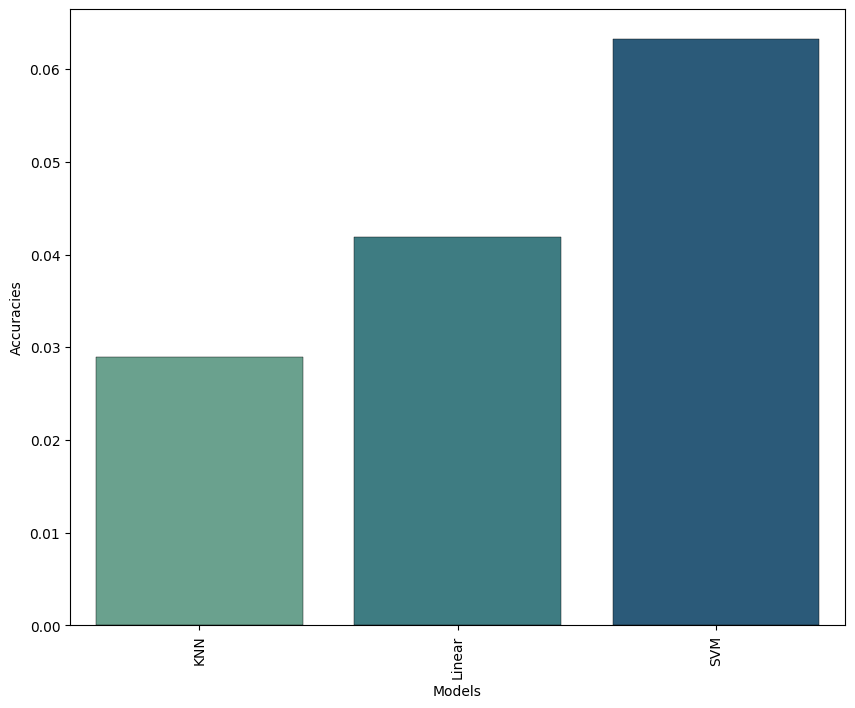

In [ ]:
# plot all the accuracy of the models in a bar plot in descending order
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# create a list of all the models
models = ['Linear', 'SVM', 'KNN']
# create a list of all the accuracies
accuracies = [ mean_squared_error(ytest, y_pred_linear), mean_squared_error(ytest, y_pred_svm), mean_squared_error(ytest, y_pred_knnr), ]
# create a dataframe of the models and their accuracies
df = pd.DataFrame({'Models': models, 'Accuracies': accuracies})
# sort the dataframe in descending order
df = df.sort_values(by = 'Accuracies', ascending = True)
# plot the dataframe
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Models', y = 'Accuracies', data = df, palette = 'crest', edgecolor = 'black', linewidth = 0.3)
plt.xticks(rotation = 90)
plt.show()

Regression Input Test

In [ ]:
inp = input().split()
random_input = list(map(int, inp))
y_pred_svm = svr_model.predict(xtest)
y_pred_linear = linear.predict(xtest)
y_pred_knnr = knn_model.predict(xtest)
print(y_pred_svm)
print(y_pred_linear)
print(y_pred_knnr)